# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import glob
import datetime
import gmaps
import matplotlib.pyplot as plt

In [2]:
path = "../Resources/Airbnb/Current_Listing/listings.csv"
listing_df = pd.read_csv(path, low_memory = False)
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190602163209,2019-06-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190602163209,2019-06-03,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190602163209,2019-06-03,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190602163209,2019-06-03,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.53
4,4989,https://www.airbnb.com/rooms/4989,20190602163209,2019-06-03,Great 1 bdrm. apartment in the PERFECT location!,Best location in NYC (the greatest city in the...,"Quiet, artsy, 1 bdrm. apt. in Hell's Kitchen (...",Best location in NYC (the greatest city in the...,none,"Hell's Kitchen is a safe, popular, and desirab...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24


# Average Price Per Person Computations

### Dataframe to collect all data related to pricing and clean-up

In [3]:
#Identify columns in the data that are relevant to computation of average price
price_cols = ['id', 'name', "city", "state", "zipcode", 'latitude', 'longitude', 'property_type',
        'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'minimum_nights', 'maximum_nights',
        'price', 'cleaning_fee', 'beds','bed_type', 'weekly_price', 'monthly_price', 
        'guests_included','extra_people', 'number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_location', 
        'instant_bookable','is_business_travel_ready']
#Reduced dataframe with above columns 
listing_prc_red_df = listing_df[price_cols]
#Preview 
listing_prc_red_df.head()

,id,name,city,state,zipcode,latitude,longitude,property_type,room_type,accommodates,...,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_value,review_scores_location,instant_bookable,is_business_travel_ready
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,1,$35.00,9,98.0,10.0,10.0,10.0,10.0,f,f
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,2,$0.00,44,95.0,9.0,9.0,9.0,10.0,f,f
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,New York,NY,10027,40.80902,-73.94190,Apartment,Private room,2,...,2,$20.00,0,NaN,NaN,NaN,NaN,NaN,f,f
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,NY,11238,40.68514,-73.95976,Guest suite,Entire home/apt,3,...,1,$0.00,258,90.0,10.0,9.0,9.0,10.0,f,f
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,1,$0.00,27,89.0,9.0,9.0,9.0,10.0,f,f


In [4]:
# List of columns where nulls need to be dropped 
dropna_prc_cols = ['id', 'name', "zipcode", 'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates', 'minimum_nights', 'maximum_nights',
        'price', 'cleaning_fee','number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value', 
        'instant_bookable','is_business_travel_ready']
# Drop rows 
listing_rdc_prc_dna_df = listing_prc_red_df.dropna(subset = dropna_prc_cols)

In [5]:
# List of columns where values are to be filled with zeros 
listing_rdc_prc_dna_df["cleaning_fee"] = listing_rdc_prc_dna_df["cleaning_fee"].fillna(0).copy()
listing_rdc_prc_dna_df["weekly_price"] = listing_rdc_prc_dna_df["weekly_price"].fillna(0).copy()
listing_rdc_prc_dna_df["monthly_price"] = listing_rdc_prc_dna_df["monthly_price"].fillna(0).copy()
listing_rdc_prc_dna_df["guests_included"] = listing_rdc_prc_dna_df["guests_included"].fillna(0).copy()
listing_rdc_prc_dna_df["extra_people"] = listing_rdc_prc_dna_df["extra_people"].fillna(0).copy()

C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [6]:
#Rename columns to have something more readble 
renamed_prc_listing = listing_rdc_prc_dna_df.rename(index=str, columns = {"id":"ID", "name":"AirBnb Name", 
                    "city": "City", "state": "State", "zipcode":"Zipcode", "latitude":"Latitude", "longitude":"Longitude",
                    "property_type":"Property Type", "room_type":"Room Type", "accommodates":"Accommodates",
                    "bathrooms":"Bathrooms", "bedrooms":"Bedrooms", "minimum_nights":"Min Nights", "maximum_nights":"Max Nights",                                       
                    "price":"Price", "cleaning_fee": "Cleaning Fee", "beds": "No. Beds","bed_type": "Bed Type", 
                    "weekly_price" : "Weekly Price", "monthly_price" : "Monthly Price",  "guests_included" : "Guests Included",
                    "extra_people" : "Extra People", "number_of_reviews":"# of Reviews", "review_scores_rating":"Review Score",                                         
                    "review_scores_accuracy": "Accuracy", "review_scores_cleanliness": "Cleanliness", "review_scores_value":"Value Review",
                    "review_scores_location": "Location Review","instant_bookable":"Instant Bookable","is_business_travel_ready":"Business Travel Ready"})
                                                
renamed_prc_listing.count()

ID                       31211
AirBnb Name              31211
City                     31173
State                    31210
Zipcode                  31211
Latitude                 31211
Longitude                31211
Property Type            31211
Room Type                31211
Accommodates             31211
Bathrooms                31184
Bedrooms                 31194
Min Nights               31211
Max Nights               31211
Price                    31211
Cleaning Fee             31211
No. Beds                 31202
Bed Type                 31211
Weekly Price             31211
Monthly Price            31211
Guests Included          31211
Extra People             31211
# of Reviews             31211
Review Score             31211
Accuracy                 31211
Cleanliness              31211
Value Review             31211
Location Review          31208
Instant Bookable         31211
Business Travel Ready    31211
dtype: int64

In [7]:
#Removing $ and , from Price and Cleaning Fee to convert them to float
renamed_prc_listing["Price"] = renamed_prc_listing["Price"].str.replace('$', '')
renamed_prc_listing["Price"] = renamed_prc_listing["Price"].str.replace(',', '')

renamed_prc_listing["Cleaning Fee"] = renamed_prc_listing["Cleaning Fee"].str.replace('$', '')
renamed_prc_listing["Cleaning Fee"] = renamed_prc_listing["Cleaning Fee"].str.replace(',', '')

renamed_prc_listing["Weekly Price"] = renamed_prc_listing["Price"].str.replace('$', '')
renamed_prc_listing["Weekly Price"] = renamed_prc_listing["Price"].str.replace(',', '')

renamed_prc_listing["Monthly Price"] = renamed_prc_listing["Cleaning Fee"].str.replace('$', '')
renamed_prc_listing["Monthly Price"] = renamed_prc_listing["Cleaning Fee"].str.replace(',', '')

renamed_prc_listing["Extra People"] = renamed_prc_listing["Extra People"].str.replace('$', '')
renamed_prc_listing["Extra People"] = renamed_prc_listing["Extra People"].str.replace(',', '')

renamed_prc_listing[["Price", "Cleaning Fee", "Weekly Price", "Monthly Price", "Extra People"]] = renamed_prc_listing[["Price", "Cleaning Fee", "Weekly Price", "Monthly Price", "Extra People"]].apply(pd.to_numeric)
renamed_prc_listing.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Guests Included,Extra People,# of Reviews,Review Score,Accuracy,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,1,35.0,9,98.0,10.0,10.0,10.0,10.0,f,f
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,2,0.0,44,95.0,9.0,9.0,9.0,10.0,f,f
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,1,0.0,27,89.0,9.0,9.0,9.0,10.0,f,f
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,1,20.0,9,93.0,10.0,9.0,10.0,9.0,f,f
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,2,100.0,71,88.0,10.0,9.0,9.0,9.0,t,f


In [8]:
#Cleansing Data Further

#Minimum Rating Score of 80
clean_airbnb_prc = renamed_prc_listing[renamed_prc_listing["Review Score"] >= 80].copy()

#Cleanliness & Location Accuracy Should be at least 8
clean_airbnb_prc = clean_airbnb_prc[(clean_airbnb_prc["Cleanliness"] >= 8) & (clean_airbnb_prc["Location Review"] >=8)].copy()

#Total Price combining Cleaning Fee w/ Price
clean_airbnb_prc["Total Price"] = clean_airbnb_prc["Price"] + clean_airbnb_prc["Cleaning Fee"]

#Output to csv
clean_airbnb_prc.to_csv("../Resources/Airbnb/Current_Listing/clean_airbnb_prc.csv")


# Binning to identify groups of accomodations

In [9]:
#Bin the Accomodates as [1-2, 3-4, 5-9, 10+] for each Room Type 
acco_bins = [0, 2, 4, 9, 25]
# Create the names for the  bins
group_names = ["1-2", "3-4", "5-9", "10+"]
clean_airbnb_prc['Accomodation Groups'] = pd.cut(clean_airbnb_prc['Accommodates'], acco_bins, labels = group_names )
clean_airbnb_prc['Avg Per Person'] = clean_airbnb_prc['Total Price']/clean_airbnb_prc['Accommodates']
clean_airbnb_prc.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Review Score,Accuracy,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready,Total Price,Accomodation Groups,Avg Per Person
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,98.0,10.0,10.0,10.0,10.0,f,f,174.0,1-2,87.0
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,95.0,9.0,9.0,9.0,10.0,f,f,325.0,1-2,162.5
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,89.0,9.0,9.0,9.0,10.0,f,f,130.0,1-2,65.0
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,93.0,10.0,9.0,10.0,9.0,f,f,160.0,1-2,160.0
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,88.0,10.0,9.0,9.0,9.0,t,f,325.0,1-2,162.5


In [10]:
#Compute Average by bins 
acco_avg_df = clean_airbnb_prc.groupby(by=['Room Type', 'Accomodation Groups'], as_index=False).aggregate({'Avg Per Person':'mean'})
acco_avg_df

,Room Type,Accomodation Groups,Avg Per Person
0,Entire home/apt,1-2,117.483951
1,Entire home/apt,3-4,72.188188
2,Entire home/apt,5-9,60.464675
3,Entire home/apt,10+,56.110056
4,Private room,1-2,71.018422
5,Private room,3-4,40.155497
6,Private room,5-9,41.861393
7,Private room,10+,32.616922
8,Shared room,1-2,65.291434
9,Shared room,3-4,34.443627


In [11]:
acco_avg_df_pivot = acco_avg_df.pivot(index='Room Type', values='Avg Per Person', columns = 'Accomodation Groups')
acco_avg_df_pivot.head()

Accomodation Groups,1-2,3-4,5-9,10+
Room Type,,,,
Entire home/apt,117.483951,72.188188,60.464675,56.110056
Private room,71.018422,40.155497,41.861393,32.616922
Shared room,65.291434,34.443627,33.467687,22.312500


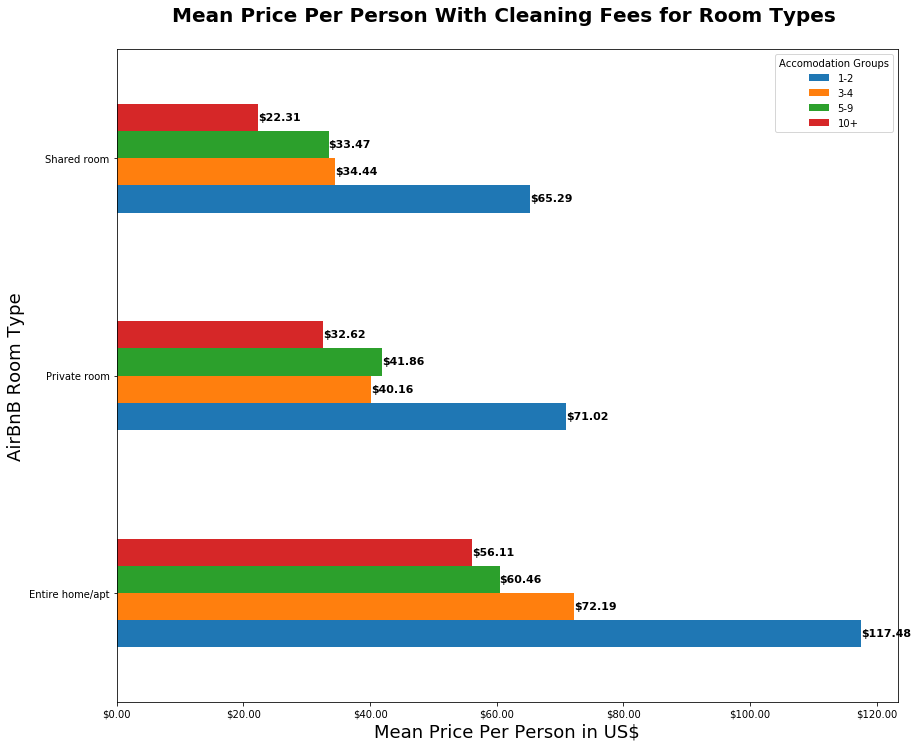

In [22]:
#Generate Plots
import matplotlib.ticker as mtick
fmt = '$%.2f'
# Set figure width to 8 and height to 6
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

ax = acco_avg_df_pivot.plot.barh(stacked = False);
tick = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# find the values and append to list

# create a list to collect the plt.patches data
totals = []

for i in ax.patches:
    totals.append(i.get_width())


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y() + 0.05, "${0:.2f}".format(round(i.get_width(),2)),  fontsize=11,color='black', weight= "bold")

plt.title("Mean Price Per Person With Cleaning Fees for Room Types \n", fontsize = 20, weight = "bold")
plt.xlabel('Mean Price Per Person in US$', fontsize= 18)
plt.ylabel('AirBnB Room Type', fontsize= 18)

plt.savefig("../Resources/Airbnb/Current_Listing/MeanPriceByRoomTypes.png")

In [15]:
clean_airbnb_prc.to_csv("../Resources/Airbnb/Current_Listing/clean_airbnb_prc_binned.csv")

## Computations for the Average Price by Accomodation Groups as Box Plot

In [16]:
#Bin the Price per Person [0-25, 26-50, 51-75, 76-100, 101-250, 251-500, 501-750, 751-1000, 1001-1500, 1500+] 
avgprc_bins = [0, 25, 50, 75, 100, 250, 500, 750, 1000, 1500, 12000]
# Create the names for the  bins
avg_bkts = ["0 to 25", "26 to 50", "51 to 75", "76-100", "101 to 250", "251 to 500", 
            "501 to 750", "751 to 1000", "1001 to 1500", "1501+"]
clean_airbnb_prc['Person Avg Bins'] = pd.cut(clean_airbnb_prc['Avg Per Person'], avgprc_bins, labels = avg_bkts )
clean_airbnb_prc.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Accuracy,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready,Total Price,Accomodation Groups,Avg Per Person,Person Avg Bins
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,174.0,1-2,87.0,76-100
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,9.0,9.0,9.0,10.0,f,f,325.0,1-2,162.5,101 to 250
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,9.0,9.0,9.0,10.0,f,f,130.0,1-2,65.0,51 to 75
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,10.0,9.0,10.0,9.0,f,f,160.0,1-2,160.0,101 to 250
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,10.0,9.0,9.0,9.0,t,f,325.0,1-2,162.5,101 to 250


In [17]:
#Compute counts of price by bins 
price_avg_df = clean_airbnb_prc.groupby(by=['Person Avg Bins']).aggregate({'Person Avg Bins':'count'})
price_avg_df['Person Avg Pct'] = 100*(price_avg_df['Person Avg Bins']/(price_avg_df['Person Avg Bins'].sum()))
price_avg_df

,Person Avg Bins,Person Avg Pct
Person Avg Bins,,
0 to 25,1162,3.959654
26 to 50,8846,30.143802
51 to 75,8380,28.555851
76-100,5062,17.249370
101 to 250,5687,19.379132
251 to 500,184,0.627002
501 to 750,10,0.034076
751 to 1000,3,0.010223
1001 to 1500,4,0.013630


In [18]:
# Remove buckets above $250 or below $5
clean_airbnb_prc_box = clean_airbnb_prc.loc[(clean_airbnb_prc['Avg Per Person'] > 5) & (clean_airbnb_prc['Avg Per Person'] < 251)]

clean_airbnb_prc_box['Avg Per Person'].count()

29135

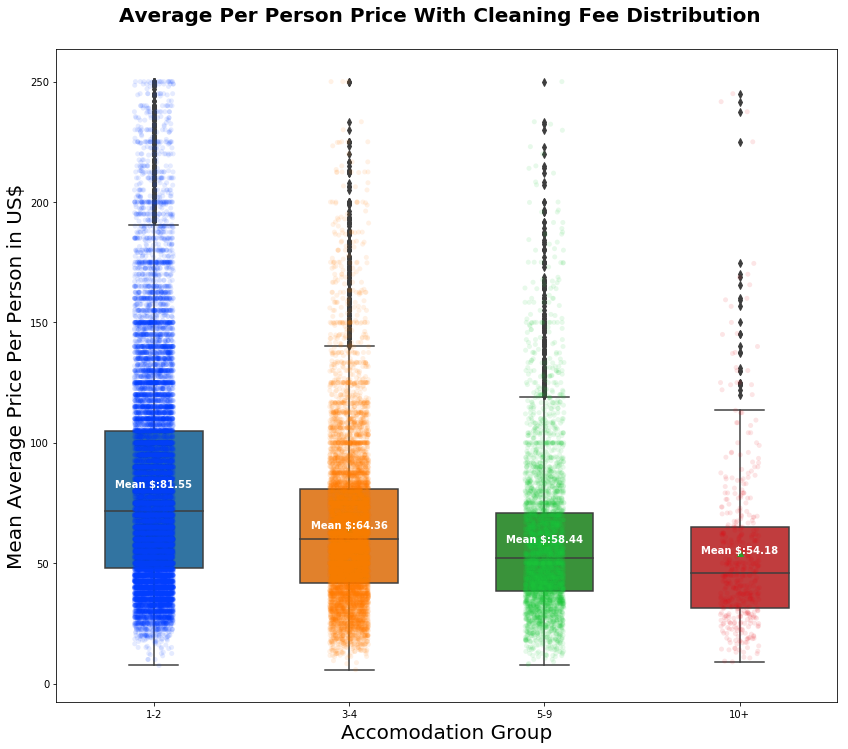

In [24]:
# import seaborn
import seaborn as sns

# hue = 'Room Type'

                  
ax =sns.stripplot(y='Avg Per Person', x='Accomodation Groups',data= clean_airbnb_prc_box, jitter=True, palette = 'bright',
                  color = 'blue', alpha = 0.1)                  

ax =sns.boxplot(y='Avg Per Person', x='Accomodation Groups', data= clean_airbnb_prc_box, width=0.5, 
                  showmeans=True)

plt.title("Average Per Person Price With Cleaning Fee Distribution  \n", fontsize = 20, weight = "bold")
plt.xlabel('Accomodation Group', fontsize= 20)
plt.ylabel('Mean Average Price Per Person in US$', fontsize= 20)


# Calculate number of obs per group & median to position labels
means = clean_airbnb_prc_box.groupby(['Accomodation Groups'])['Avg Per Person'].mean().values.round(2)
nobs = [str(x) for x in means.tolist()]
nobs = ["Mean $:" + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], means[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='medium', color='w', weight='bold')
    
plt.savefig("../Resources/Airbnb/Current_Listing/AveragePriceDistBoxPlot.png")
